<a href="https://colab.research.google.com/github/MatteoAldovardi92/Taxi_Project/blob/main/TaxiDriverClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')


!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle

!kaggle datasets download -d mnavas/taxi-routes-for-mexico-city-and-quito

!unzip taxi-routes-for-mexico-city-and-quito.zip



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/mnavas/taxi-routes-for-mexico-city-and-quito
License(s): CC-BY-SA-4.0
taxi-routes-for-mexico-city-and-quito.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  taxi-routes-for-mexico-city-and-quito.zip
replace all-data_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [70]:

import pandas as pd
df = pd.read_csv('all-data_clean.csv')

In [71]:
df.columns

pickup_locations = [(lat, lon) for lat, lon in zip(df['pickup_latitude'], df['pickup_longitude']) ]




In [ ]:
# The cities in the dataset seem to be three thus I will try to run a k-mean clustering with k = 3

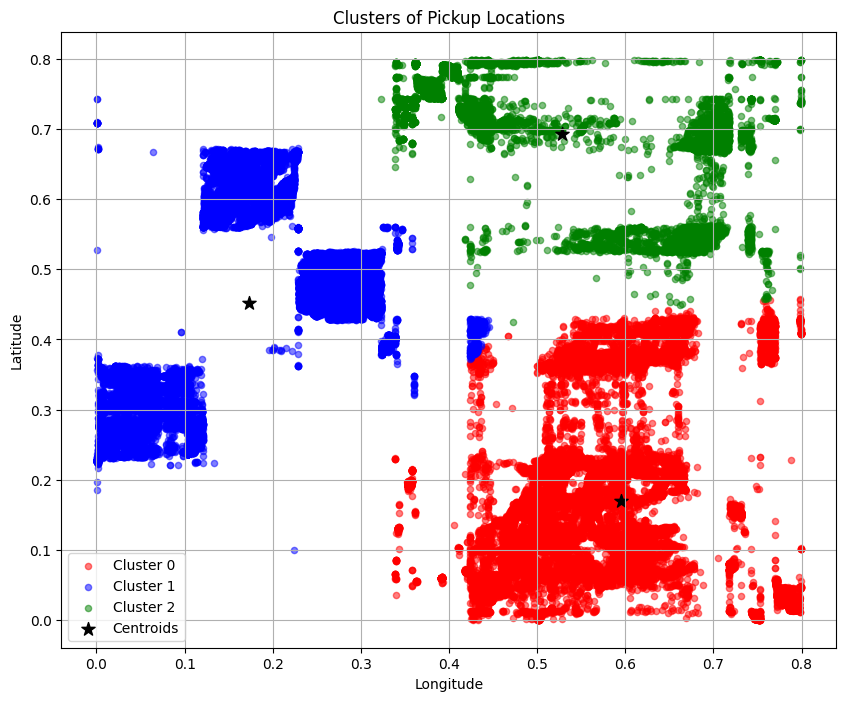

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# Extract pickup locations
pickup_locations = [(lat, lon) for lat, lon in zip(df['pickup_latitude'], df['pickup_longitude'])]
pickup_locations = np.array(pickup_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans1 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans1.fit(pickup_locations)

# Get cluster labels and centroids
pickup_labels = kmeans1.labels_
centroids = kmeans1.cluster_centers_

# Create a pandas DataFrame from the pickup locations, labels and centroids
df_plot = pd.DataFrame(pickup_locations, columns=['pickup_latitude', 'pickup_longitude'])
df_plot['cluster'] = pickup_labels

# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the pickup points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids)):
    cluster_points = df_plot[df_plot['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points['pickup_longitude'], cluster_points['pickup_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points['pickup_longitude'], cluster_points['pickup_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids)[:, 1], np.array(centroids)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Pickup Locations')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
kmeans1.inertia_


2596.307326619315

## Dropoff locations

In [74]:
dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude']) ]



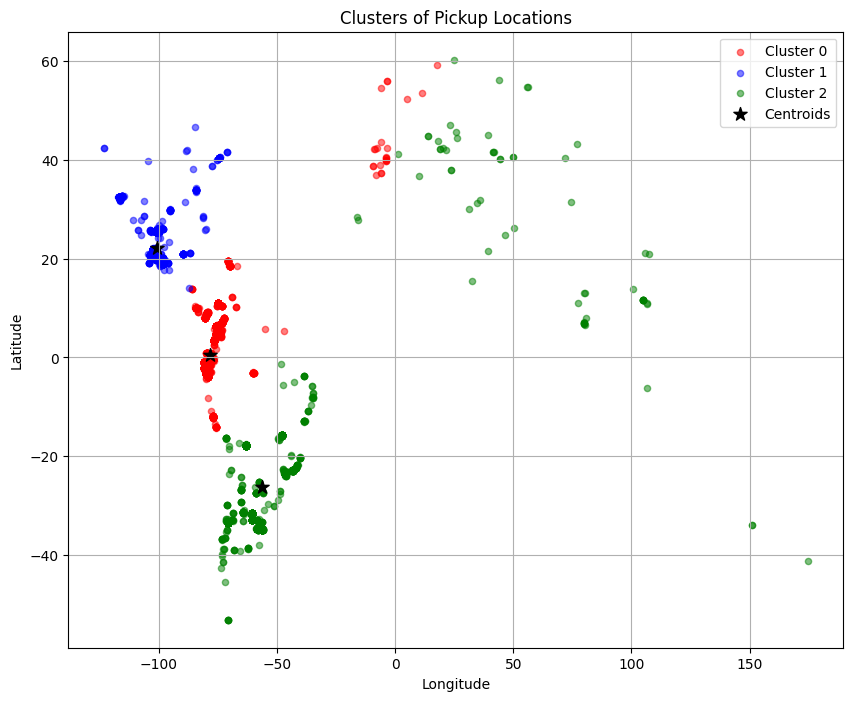

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans



# Extract dropoff locations
dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude'])]
dropoff_locations = np.array(dropoff_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans2 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans2.fit(dropoff_locations)

# Get cluster labels and centroids
dropoff_labels = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

# Create a pandas DataFrame from the dropoff locations, labels and centroids
df_plot2 = pd.DataFrame(dropoff_locations, columns=['dropoff_latitude', 'dropoff_longitude'])
df_plot2['cluster'] = dropoff_labels
# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the dropoff points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids2)):
    cluster_points2 = df_plot2[df_plot2['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids2)[:, 1], np.array(centroids2)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Pickup Locations')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
kmeans2.inertia_

2597274.9926640918

## Update the dataframe with the new features given by the cluster labels:

In [77]:
df['droppoff_cluster'] = dropoff_labels
df['pickup_cluster'] = pickup_labels


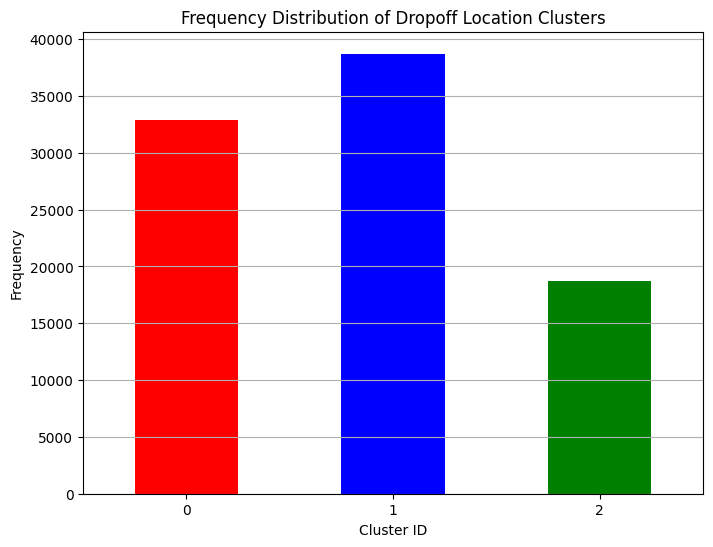

In [78]:
# Calculate cluster frequencies
cluster_counts = df['pickup_cluster'].value_counts().sort_index()

# Create a bar chart of the cluster distribution
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']) # Add more colors if needed
plt.title('Frequency Distribution of Dropoff Location Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y')
plt.show()

In [79]:
df[['pickup_cluster', 'droppoff_cluster']]

,pickup_cluster,droppoff_cluster
0,2,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
90282,2,0
90283,2,0
90284,1,1
90285,2,0


In [81]:
df[['pickup_cluster', 'droppoff_cluster']].value_counts()

pickup_cluster  droppoff_cluster
1               1                   38135
0               0                   32183
2               0                   17037
                2                    1519
0               2                     654
1               0                     391
                2                     202
2               1                     127
0               1                      39
Name: count, dtype: int64

### Geodetic distance and mean velocity:
Geodetic Distance and Mean Velocity
I expect the mean velocity to be a decisive feature for accurate predictions. In fact, it almost feels like cheating to use it—after all, to predict trip duration, the model could simply invert the formula
$$
v_m = dist/trip_duration
$$

If, even with this feature, the model fails to produce a reliable regression, then it’s clear that some crucial aspect is missing.

In your presentation, you can humorously say that, by some miracle, you obtained the mean velocities for each trip—but not the trip durations!